# Matemáticas para IA con Python.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/luiggix/intro_MeIA_2023">Matemáticas para IA con Python</a> by <span property="cc:attributionName">Luis Miguel de la Cruz Salas</span> is licensed under <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">CC BY-NC-SA 4.0<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

# Objetivo.

En esta práctica se va realizar un análisis y visualización complementario del TFR (Total Fertility Rate) mundial comparando con otros factores de desarrollo.

# Importar las bibliotecas 
Incluimos las bibliotecas necesarias para la lectura de datos y para la visualización.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Lectura de datos de FR
Usamos la misma información de la población usada en la notebook <a href="../02_Python_cientifico/05_Analisis_de_poblacion.ipynb">05_Analisis_de_poblacion.ipynb</a>:

In [2]:
TFR = pd.read_csv('../utils/data/UNdata_Export_20211229_175420412.zip')

# Se agrupa por país 
paises = TFR.groupby('Country or Area')

In [3]:
TFR

,Country or Area,Year(s),Variant,Value
0,Afghanistan,2015-2020,Medium,4.555
1,Afghanistan,2010-2015,Medium,5.447
2,Afghanistan,2005-2010,Medium,6.478
3,Afghanistan,2000-2005,Medium,7.182
4,Afghanistan,1995-2000,Medium,7.654
...,...,...,...,...
4041,Zimbabwe,1970-1975,Medium,7.400
4042,Zimbabwe,1965-1970,Medium,7.400
4043,Zimbabwe,1960-1965,Medium,7.300
4044,Zimbabwe,1955-1960,Medium,7.000


# Funciones para graficación
Las funciones `maxminTicks()`, `inicializaGrafica()`, `graficaTFR()`, `graficaTFR_Pais()`, usadas en la notebook <a href="../02_Python_cientifico/05_Analisis_de_poblacion.ipynb">05_Analisis_de_poblacion.ipynb</a>, se importan del módulo `analisis_poblacion.py`, para usarse en lo que sigue.

In [4]:
import analisis_poblacion as ap

# Visualización del *canvas* 
Calculamos el máximo en el eje $y$ y los `yticks` y posteriormente hacemos la gráfica base.

In [5]:
p_max, y_max, p_min, y_min, yticks = ap.maxminTicks(TFR)
print('Máximo = {}, \t País : {}'.format(y_max, p_max))
print('Mínimo = {}, \t País : {}'.format(y_min, p_min))
print('yticks : {}'.format(yticks))

Máximo = 8.8, 	 País : Yemen
Mínimo = 0.85, 	 País : China, Macao SAR
yticks : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


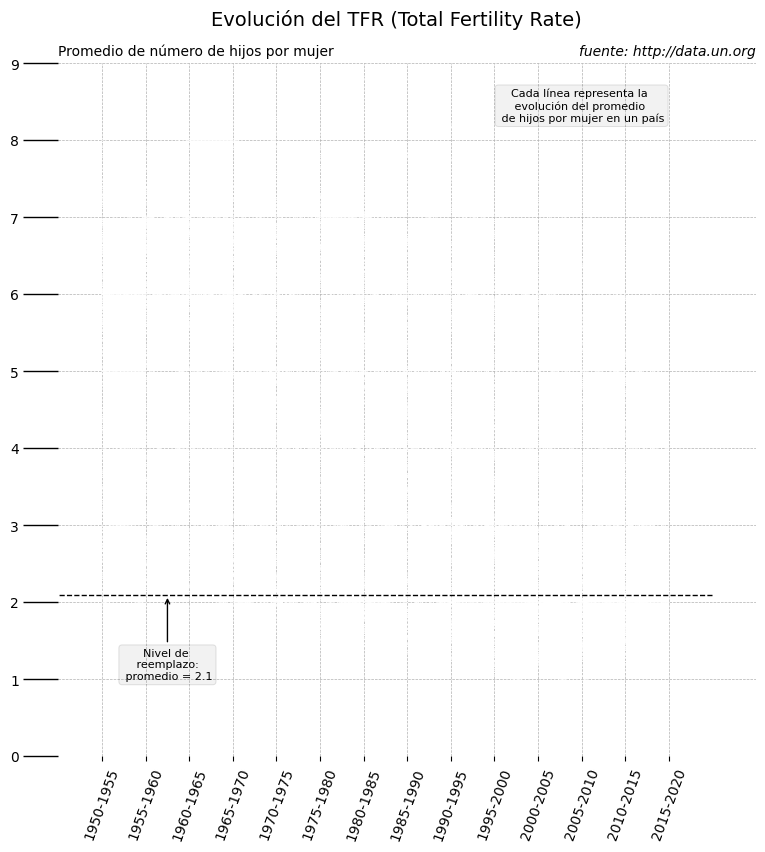

In [6]:
# Hacemos la gráfica base
ap.inicializaGrafica(y_max, yticks)
ap.graficaTFR(paises, lw = 0.5, c = '#FFFFFF')

<a href="gdp"></a>
# Selección de países con diferente GDP.
Definimos un conjunto de países a ser graficados y sus colores correspondientes. Elegimos países con diferente PIB per cápita y diferente zona geográfica, en este caso serán: México, Colombia, Japón, Alemania, Egipto, Argentina, Nigeria. Además agregamos a los países que hayan tenido el máximo y el mínimo de TFR en el rango de tiempo estudiado. También agregamos los datos promedio anuales mundiales.

In [7]:
paises_colores = {
    'Mexico'                   : 'C0', 
    'Colombia'                 : 'C1',
    'Japan'                    : 'C2',  
    'Germany'                  : 'C3',  
    'Egypt'                    : 'C4',
    'Argentina'                : 'C5',
    'Nigeria'                  : 'C6',
    p_max                      : 'red',      # País con el valor máximo
    p_min                      : 'blue',     # País con el valor mínimo
    'World'                    : 'black'     # Datos promedio mundiales
}

# Visualización de los países
Realizamos las gráficas para estos países.

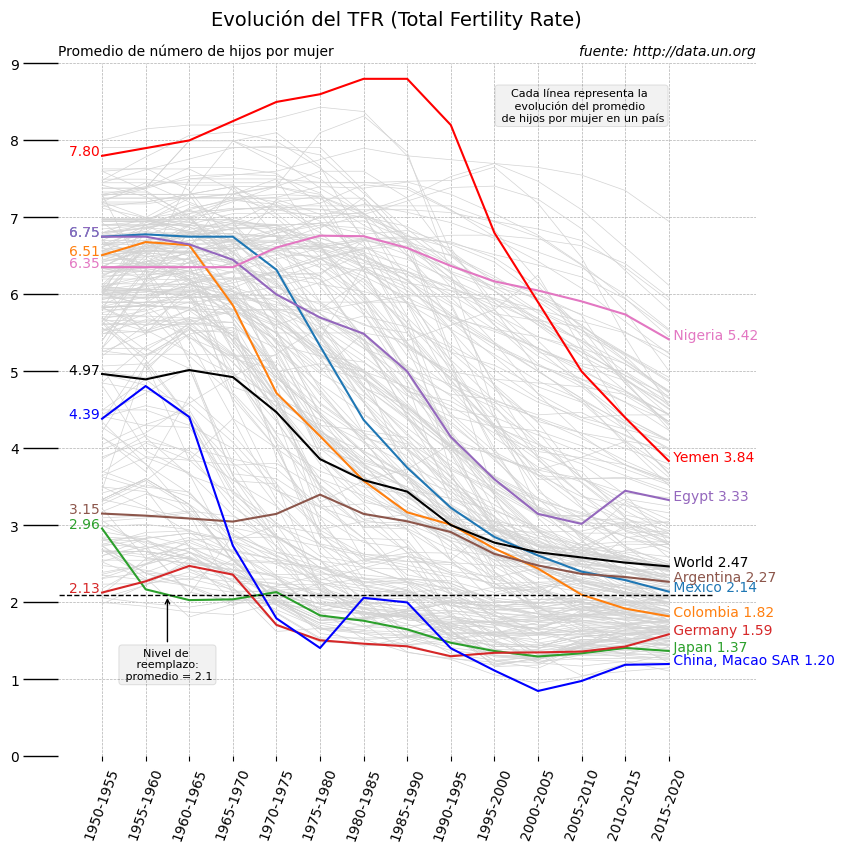

In [8]:
# Hacemos la gráfica base
ap.inicializaGrafica(y_max, yticks)
ap.graficaTFR(paises, lw = 0.5, c = 'lightgrey')

# Hacemos la gráfica para los países definidos antes para 
# hacer la comparación entre ellos.
for p, c in paises_colores.items():
    ap.graficaTFR_Pais(paises, p, ls = '-', c = c)

plt.show()

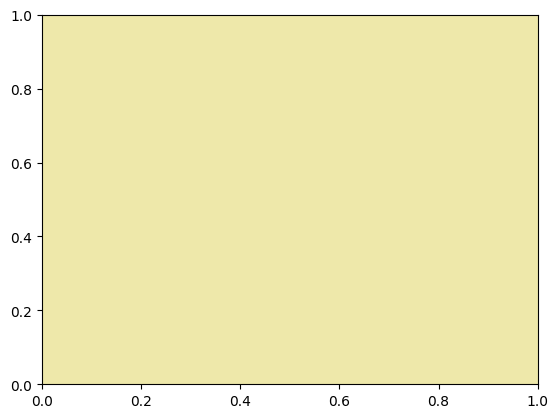

In [9]:
# Cambio de color del fondo de la gráfica
ax = plt.gca()
ax.set_facecolor('palegoldenrod')

# Datos del PIB per cápita por país
Vamos ahora a complementar esta visualización con información del PIB per capita en cada país.

Obtenemos la información de los ingresos por persona en cada país de http://data.un.org haciendo la búsqueda de 'per capita income' y seleccionando el conjunto de datos 'Gross national income per capita (PPP int. \$)' como se muestra en la siguiente figura:

<img src="../utils/fig/PerCapita.png"  style="width: 800px;"/>

**Observación** : Elegimos datos solo para el año 2010, que es el año en el que vamos a realizar la comparación. Por esta razón tomaremos los datos de 2005-2010 para el caso del FR.

In [10]:
TFR.head()

,Country or Area,Year(s),Variant,Value
0,Afghanistan,2015-2020,Medium,4.555
1,Afghanistan,2010-2015,Medium,5.447
2,Afghanistan,2005-2010,Medium,6.478
3,Afghanistan,2000-2005,Medium,7.182
4,Afghanistan,1995-2000,Medium,7.654


In [11]:
# Leemos el archivo con los datos del PIB en un DataFrame
per_capita_income = pd.read_csv('../utils/data/UNdata_Export_20211023_002155840.zip')
pd.set_option('display.max_rows', None) # Para poder ver todo el dataframe
per_capita_income

,Country or Area,Year(s),Value,Value Footnotes
0,Afghanistan,2010,1300,NaN
1,Albania,2010,8480,NaN
2,Algeria,2010,7970,NaN
3,Angola,2010,5000,NaN
4,Antigua and Barbuda,2010,18840,NaN
5,Armenia,2010,7510,NaN
6,Australia,2010,37580,NaN
7,Austria,2010,40260,NaN
8,Azerbaijan,2010,9160,NaN
9,Bahamas,2010,28660,NaN


In [12]:
pd.set_option('display.max_rows', 15) # Regreso a un número limitado de renglones por despliegue de dataframe

## Tratamiento de los datos.
Observamos que el número de países listados en los dos DataFrames, el de fertilidad y el de ingresos, es diferente, así que necesitamos ajustarlos para poder hacer una comparación entre ellos.

In [13]:
# Se agrupa por país la información de los ingresos para acceder más fácil y 
# de manera similar a como se hace con la información del FR:
ingreso_pais = per_capita_income.groupby('Country or Area')

In [14]:
# Checamos la longitud de cada agrupación para ver si coinciden
print(len(paises.groups.keys()), len(per_capita_income)) 

286 174


Debido a que no tenemos la misma información en ambas agrupaciones, haremos un ajuste para comparar solo la información que esté presente en ambos conjuntos de datos.

In [15]:
# Lista de países a comparar:
lista_paises_final = []

# Hacemos el recorrido usando el DataFrame de mayor longitud (paises)
for p in paises.groups.keys():     
    try:                            
        ingreso_pais.get_group(p)    # Aseguramos que se tiene la misma info en cada DataFrame.
        lista_paises_final.append(p) # Si se tuvo éxito entonces se agrega el país a la lista final.
    except KeyError: # Captura de la excepción de tipo KeyError
        continue     # Lo único que hacemos es saltarnos el país que no está 
                     # en ambos DataFrames y continuar con el siguiente.
        
print('Lista final de países en ambos Dataframes : ', len(lista_paises_final), '\n')
print(lista_paises_final)

Lista final de países en ambos Dataframes :  169 

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cyprus', 'Democratic Republic of the Congo', 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jord

In [16]:
# Revisamos la información del FR uno de los países para identificar en qué lugar está la info de 2010
paises.get_group('Mexico')

,Country or Area,Year(s),Variant,Value
2254,Mexico,2015-2020,Medium,2.14
2255,Mexico,2010-2015,Medium,2.29
2256,Mexico,2005-2010,Medium,2.40
2257,Mexico,2000-2005,Medium,2.61
2258,Mexico,1995-2000,Medium,2.85
2259,Mexico,1990-1995,Medium,3.23
2260,Mexico,1985-1990,Medium,3.75
2261,Mexico,1980-1985,Medium,4.37
2262,Mexico,1975-1980,Medium,5.33
2263,Mexico,1970-1975,Medium,6.32


Obsérvese que la información del rango 2005-2010 se encuentra en el renglón 2 de cada grupo.

In [17]:
ingreso_pais.get_group('Mexico')

,Country or Area,Year(s),Value,Value Footnotes
98,Mexico,2010,14600,NaN


Obsérverse que cada grupo solo contiene un renglón de información (el renglón 0).

In [18]:
# Ahora creamos dos listas, una para el FR y otra para el PCI (Per Capita Income).
l_TFR = []
l_PCI = []
for p in lista_paises_final:
    l_TFR.append(paises.get_group(p)['Value'].iloc[2])  # El lugar 2 corresponde a los datos para 2010
    l_PCI.append(ingreso_pais.get_group(p)['Value'].iloc[0]) # Solo se tiene el dato para 2010

print('\nTFR (tamaño: {}) \nDatos :\n{}'.format(len(l_TFR), l_TFR))
print('\nPCI (tamaño: {}) \nDatos :\n{}'.format(len(l_PCI), l_PCI))


TFR (tamaño: 169) 
Datos :
[6.478, 1.64, 2.724, 6.35, 2.0, 1.72, 1.952, 1.399, 1.83, 1.91, 2.25, 2.482, 1.75, 1.442, 1.821, 2.84, 5.495, 2.55, 3.4, 1.312, 3.035, 1.86, 1.519, 6.079, 6.39, 2.714, 3.081, 5.25, 1.636, 5.3, 6.853, 1.898, 1.62, 2.1, 4.9, 4.8, 1.94, 1.522, 1.48, 6.633, 1.854, nan, 2.57, 2.69, 3.02, 2.395, 5.401, 4.8, 1.662, 5.45, 2.75, 1.84, 1.977, 4.2, 5.65, 1.8, 1.362, 4.365, 1.416, 2.302, 3.621, 5.535, 5.2, 2.726, 3.62, 3.244, 1.329, 2.131, 2.796, 2.5, 4.399, 2.003, 2.927, 1.436, 1.339, 3.8, 2.541, 4.65, 3.88, 2.4, 2.78, 3.4, 1.493, 1.9, 3.373, 5.2, 1.417, 1.621, 4.83, 5.73, 2.216, 2.288, 6.7, 1.393, 5.07, 1.698, 2.4, 2.397, 1.82, 2.53, 5.537, 3.608, 2.813, 1.746, 2.142, 2.68, 7.55, 5.91, 1.924, 2.9, 4.168, nan, 2.632, 4.133, 2.892, 2.68, 3.3, 1.374, 1.372, 2.23, 1.173, 1.27, 1.51, 1.456, 4.85, nan, 1.6, 2.132, 4.468, 4.85, 3.225, 5.1, 1.583, 2.3, 5.565, 1.257, 1.317, 1.435, 4.4, 2.625, 1.454, 2.279, 5.0, 2.667, 1.891, 1.469, 3.7, 3.609, 1.556, 5.3, 5.036, 4.034, 1.8, 2.

**Obsérvese** que se tienen `nan` en algunos lugares de la lista de TFR, lo que significa que no se tiene información completa para algunos países. Tomaremos esto en cuenta más adelante.

## Visualización TFR vs PCI
Ahora haremos la gráfica de esta información usando puntos en el plano.

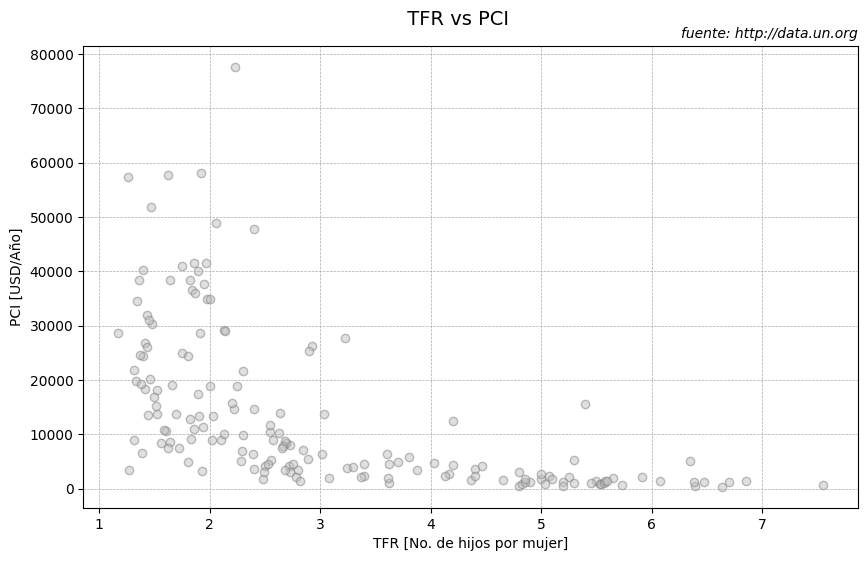

In [19]:
fig = plt.figure(figsize=(10,6)) # Cambiamos el tamaño de la figura

# Graficamos el PCI (eje $y$) en función de la FR (eje $x$)
# Usamos un color gris tenue y con transparencia. En este caso, este
# será nuestro lienzo base para todo lo demás.
plt.scatter(l_TFR, l_PCI, marker='o', fc='silver', ec='gray', alpha=0.5) 

# Información adicional y títulos
plt.title('fuente: http://data.un.org', loc='right', fontstyle='italic', fontsize=10)
plt.suptitle(' TFR vs PCI ', y = 0.94, fontsize=14)
    
plt.grid(ls='--', lw=0.5, c='#AAAAAA')
plt.xlabel('TFR [No. de hijos por mujer]')
plt.ylabel('PCI [USD/Año]')

plt.show()

Observamos en la visualización anterior que los puntos se aglomeran en ciertas zonas del espacio. Se puede ver un comportamiento decreciente conforme aumenta el TFR. 

Vamos a completar la visualización anterior, resaltando los países que elegimos antes (probablemente algunos no aparezcan debido a que ajustamos la información).

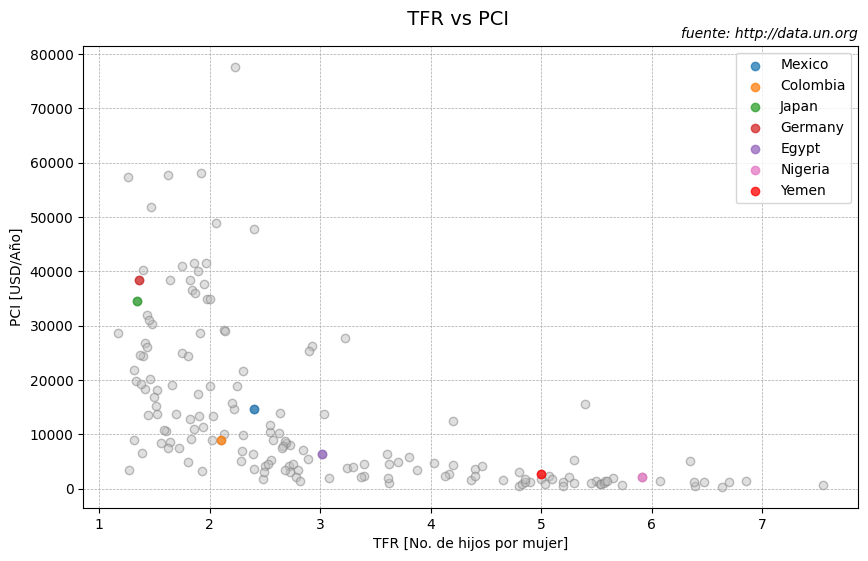

In [20]:
fig = plt.figure(figsize=(10,6)) # Cambiamos el tamaño de la figura

plt.scatter(l_TFR, l_PCI, marker='o', fc='silver', ec='gray', alpha=0.5) 
plt.title('fuente: http://data.un.org', loc='right', fontstyle='italic', fontsize=10)
plt.suptitle(' TFR vs PCI ', y = 0.94, fontsize=14)
plt.grid(ls='--', lw=0.5, c='#AAAAAA')
plt.xlabel('TFR [No. de hijos por mujer]')
plt.ylabel('PCI [USD/Año]')

# Gráfica de los países elegidos usando puntos de colores y resaltados.
for p, c in paises_colores.items():
    try:
        ip = lista_paises_final.index(p)
        plt.scatter(l_TFR[ip], l_PCI[ip], 
                    marker='o',
                    facecolor=c, edgecolor=c, alpha=0.75,
                    zorder=1000, label=p)
    except ValueError:
        continue

plt.legend()

plt.show()

## Ajuste de los datos.
Dada la tendencia que se observa en esta gráfica, vamos a intentar ajustar una curva a los datos.

Usaremos las listas `l_TFR` y `l_PCI`, para ello es importante checar si los valores que tienen son válidos. Podemos usar la función `isnan()` para verificar si hay algún *Not a Number* (`nan`) en los datos. La usaremos en combinación con la función `any()` la cual checa si al menos uno de los elementos del arreglo es `nan`:

In [21]:
np.isnan(l_TFR) # Genera un arreglo booleano

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,

In [22]:
np.isnan(l_TFR).any() # Regresa True si al menos existe un elemento nan

True

In [23]:
np.isnan(l_PCI).any()

False

Observa que la lista `l_TFR` si contienen `nan`'s, pero la lista `l_PCI` no contiene datos inválidos.


<div class="alert alert-info" role="alert">

También es posible usar la función `masked_invalid()` la cual detecta otro tipo de valores inválidos, por ejemplo:

```python
prueba = np.array([1, np.nan, 3, np.PINF, 5.0, 7])
np.ma.masked_invalid(prueba)
```
Este código genera lo siguiente:

```
masked_array(data=[1.0, --, 3.0, --, 5.0, 7.0],
             mask=[False,  True, False,  True, False, False],
       fill_value=1e+20)
```    
Si lo combinamos con `any()` se obtiene:

```python
prueba = np.array([1, np.nan, 3, np.PINF, 5.0, 7])
np.ma.masked_invalid(prueba).any()
```
Con el siguiente resultado:
```
True
```
    
</div>

Ya que sabemos que la lista `l_TFR` contiene `nan`'s haremos lo siguiente:

In [24]:
# Usaremos en este caso la función curve_fit.
from scipy.optimize import curve_fit

# La función que queremos ajustar: exponencial decreciente.
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Vamos a limpiar los datos, pues existen algunos 'nan' en ellos, particularmente en el FR.
xdata = []
ydata = []
for lf, li in zip(l_TFR, l_PCI):
    if ~np.isnan(lf):
        xdata.append(lf)
        ydata.append(li)
    
# Con las listas xdata y ydata ya podemos hacer el ajuste
popt, pcov = curve_fit(func, xdata, ydata)

# Calculamos el ...
perr = np.sqrt(np.diag(pcov))

/tmp/ipykernel_4915/387477241.py:6: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/tmp/ipykernel_4915/387477241.py:6: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c


In [25]:
print(popt, perr)

[ 6.04118127e+04  5.36204783e-01 -1.90636593e+03] [1.19428177e+04 1.85810853e-01 4.03625129e+03]


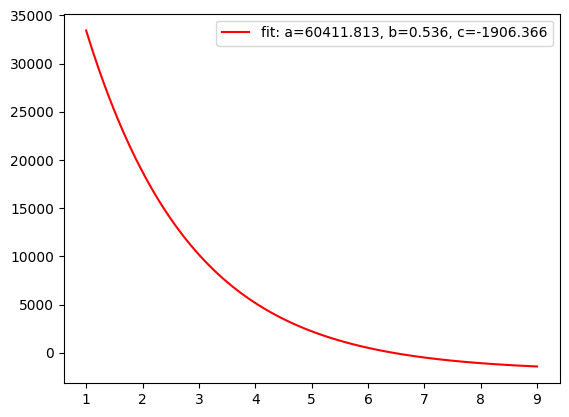

In [26]:
# Graficamos el ajuste
x = np.linspace(1,9,100)
y = func(x, *popt)
plt.plot(x, y, 'r-',label='fit: a={:5.3f}, b={:5.3}, c={:5.3f}'.format(popt[0], popt[1], popt[2]))
plt.legend()
plt.show()

Finalmente graficamos todo junto:

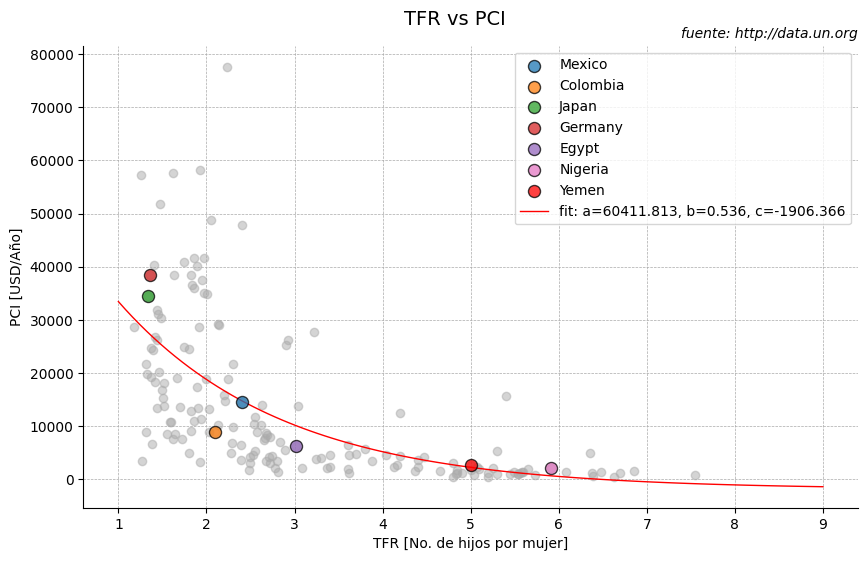

In [27]:
fig = plt.figure(figsize=(10,6)) # Cambiamos el tamaño de la figura

plt.scatter(l_TFR, l_PCI, marker='o', color='#ABABAB', alpha=0.5) 
plt.title('fuente: http://data.un.org', loc='right', fontstyle='italic', fontsize=10)
plt.suptitle('TFR vs PCI ', y = 0.94, fontsize=14)
    
plt.grid(ls='--', lw=0.5, c='#AAAAAA')
plt.xlabel('TFR [No. de hijos por mujer]')
plt.ylabel('PCI [USD/Año]')

# Gráfica de los países elegido en el paso 5 usando puntos de colores y resaltados.
for p, c in paises_colores.items():
    try:
        ip = lista_paises_final.index(p)
        plt.scatter(l_TFR[ip], l_PCI[ip], 
                    marker='o', s=75,
                    facecolor=c, edgecolor='black', alpha=0.75,
                    zorder=1000, label=p)
    except ValueError:
        continue

# Gráfica del ajuste resaltada
plt.plot(x, y, 'r-', lw=1.0, label='fit: a={:5.3f}, b={:5.3}, c={:5.3f}'.format(popt[0], popt[1], popt[2]))
plt.legend()

# Eliminamos parte del recuadro de la figura.
ejes = fig.axes
ejes[0].spines['right'].set_visible(False)
ejes[0].spines['top'].set_visible(False)
    
plt.savefig('Ajuste01.png', dpi=100)
plt.show()

- ¿Que podría mejorar de esta visualización? (colores, dimensiones, anotaciones, leyendas, ajuste de la curva, etc.)
- ¿Qué historia se puede contar con esta gráfica?

# Datos del nivel en educación.
Vamos ahora realizar una visualización similar pero con información del nivel de educación en cada país.

Obtenemos la información de http://data.un.org haciendo la búsqueda por 'education' y eligiendo el conjunto de datos 'Gross enrolment ratio. Tertiary education', como se muestra en la siguiente figura:

<img src="../utils/fig/Educacion.png"  style="width: 800px;"/>

**Observación** : igual que en el caso del ingreso, los datos son solo para el año 2010, que es el año en el que vamos a realizar la comparación.

In [28]:
# Leemos el archivo generado 
educacion = pd.read_csv('../utils/data/UNdata_Export_20211023_005512887.zip')
educacion

,Reference Area,Time Period,Sex,Age group,Units of measurement,Observation Value
0,Albania,2010,Female,Not applicable,Percent,52.38337
1,Albania,2010,Male,Not applicable,Percent,37.49551
2,Albania,2010,All genders,Not applicable,Percent,44.54065
3,Algeria,2010,Female,Not applicable,Percent,35.33614
4,Algeria,2010,All genders,Not applicable,Percent,29.83456
...,...,...,...,...,...,...
454,Yemen,2010,All genders,Not applicable,Percent,10.57348
455,Yemen,2010,Female,Not applicable,Percent,6.40428
456,Zimbabwe,2010,All genders,Not applicable,Percent,5.90560
457,Zimbabwe,2010,Male,Not applicable,Percent,6.60183


Observamos que la información viene para 'Female', 'Male' y 'All genders'.

In [29]:
# Organizamos la información por país y por sexo:
educacion_pais = educacion.groupby(['Reference Area', 'Sex'])

# Podemos por ejemplo revisar la información para México:
gender = 'Female' # Este parámetro permite elegir el sexo para la comparación.
educacion_pais.get_group(('Mexico',gender))

,Reference Area,Time Period,Sex,Age group,Units of measurement,Observation Value
289,Mexico,2010,Female,Not applicable,Percent,26.61178


Obsérvese que solo se tiene un renglón por grupo.

## Tratamiento de los datos

Igual que antes, debemos asegurarnos que tenemos el mismo número de datos.

In [30]:
lista_paises_final2 = []
for p in paises.groups.keys():
    try:
        e = educacion_pais.get_group((p, gender))
        lista_paises_final2.append(p)
    except KeyError:
        continue
        
print('Lista final de países en ambos Dataframes : ', len(lista_paises_final2), '\n')
print(lista_paises_final2)

Lista final de países en ambos Dataframes :  127 

['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bosnia and Herzegovina', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Cook Islands', 'Croatia', 'Cuba', 'Cyprus', "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gambia', 'Georgia', 'Gibraltar', 'Greece', 'Guinea', 'Guyana', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Liberia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Monaco', 'Mongolia

In [31]:
# Ahora creamos dos listas, una para el FR y otra para el nivel educativo
l_TFR2 = []
l_ED = []
for p in lista_paises_final2:
    l_TFR2.append(paises.get_group(p)['Value'].iloc[2])  # El lugar 2 corresponde a los datos para 2010
    
    e = educacion_pais.get_group((p, gender))
    l_ED.append(e['Observation Value'].iloc[0]) # Solo se tiene el dato para 2010

print('\nTFR (tamaño: {}) \nDatos :\n{}'.format(len(l_TFR2), l_TFR2))
print('\nEducación (tamaño: {}) \nDatos :\n{}'.format(len(l_ED), l_ED))


TFR (tamaño: 127) 
Datos :
[1.64, 2.724, 2.0, 2.37, 1.72, 1.76, 1.952, 1.399, 1.83, 1.75, 1.442, 1.821, 2.84, 5.495, nan, 2.55, 1.312, 1.884, 1.519, 6.079, 6.39, 3.081, 5.25, 5.3, 6.853, 1.898, 1.62, 2.1, 4.9, nan, 1.522, 1.577, 1.48, 5.25, 1.854, 3.55, 3.02, 2.395, 4.8, 1.662, 5.45, 1.84, 1.977, 5.65, 1.8, nan, 1.416, 5.535, 2.726, 3.244, 1.329, 2.131, 2.796, 2.5, 2.003, 1.436, 2.28, 1.339, 3.8, 2.541, 2.78, 3.4, 1.493, 1.9, 5.2, nan, 1.417, 1.621, 4.83, 5.73, 6.7, 1.393, 5.07, 1.698, 2.4, nan, 2.397, 1.82, 2.53, 5.537, 2.813, 1.746, 2.142, 7.55, 1.924, 2.9, 2.632, 2.892, 2.68, 3.3, 1.374, 1.372, 1.72, 2.23, 1.173, 1.51, 4.85, 1.6, nan, 4.85, 3.225, 5.1, 1.583, 2.3, 1.317, 1.435, 1.454, 2.279, 5.0, 1.891, 1.469, 3.7, 3.609, 1.556, 5.3, 2.024, 2.202, 6.38, 1.383, 1.97, 5.579, 2.055, 2.03, 2.49, 1.928, 5.0, 3.885]

Educación (tamaño: 127) 
Datos :
[52.38337, 35.33614, 22.6758, 89.15845, 63.13266, 43.94988, 94.4554, 74.21418, 19.15638, 95.85448, 94.43531, 75.79072, 26.86975, 6.88722, 40

## Visualización TFR vs Educación

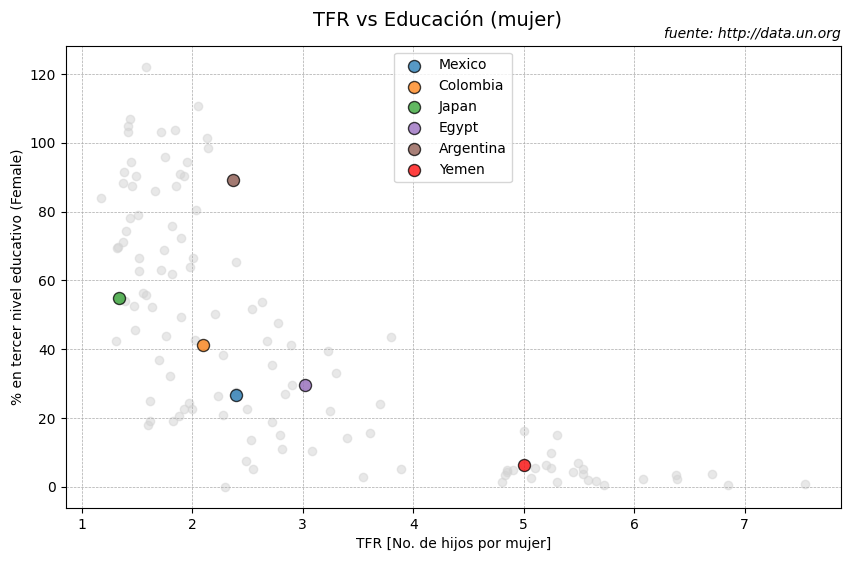

In [32]:
fig = plt.figure(figsize=(10,6)) # Cambiamos el tamaño de la figura

# Graficamos el nivel de eduación (eje $y$) en función de la fertilidad (eje $x$)
plt.scatter(l_TFR2, l_ED, marker='o', color='lightgray', alpha=0.5) 

# Información adicional y títulos
plt.title('fuente: http://data.un.org', loc='right', fontstyle='italic', fontsize=10)
plt.suptitle('TFR vs Educación (mujer) ', y = 0.94, fontsize=14)
    
plt.grid(ls='--', lw=0.5, c='#AAAAAA')
plt.xlabel('TFR [No. de hijos por mujer]')
plt.ylabel('% en tercer nivel educativo ({})'.format(gender))

# Gráfica de los países elegido en el paso 5 usando puntos de colores y resaltados.
for p, c in paises_colores.items():
    try:
        ip = lista_paises_final2.index(p)
        plt.scatter(l_TFR2[ip], l_ED[ip], 
                    marker='o', s=75,
                    facecolor=c, edgecolor='k', alpha=0.75,
                    zorder=1000, label=p)
    except ValueError:
        continue

plt.legend(loc='upper center')

plt.show()

- ¿Qué se puede decir de esta visualización?
- ¿Cómo se podría mejorar? (colores, dimensiones, anotaciones, leyendas, etc)
- ¿Podría realizar un ajuste de una curva a estos datos?
- ¿Cree que los datos están correctos?

# Visualización final TFR vs PCI vs ED.

Finalmente vamos a combinar las tres variables: TFR, ingresos, educación, en una sola visualización.

## Tratamiento de los datos.

In [33]:
# Creamos una lista de países que tengan la información de las tres variables.
lista_paises_final3 = []
for p in lista_paises_final:
    if p in lista_paises_final2:
        lista_paises_final3.append(p)

print('Total de países para la comparación: {} \n\n'.format(len(lista_paises_final3)), lista_paises_final3)

Total de países para la comparación: 112 

 ['Albania', 'Algeria', 'Antigua and Barbuda', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bosnia and Herzegovina', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Croatia', 'Cyprus', 'Denmark', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gambia', 'Georgia', 'Greece', 'Guinea', 'Guyana', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Liberia', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Nepal', 'Netherlands', 'New Zealand', 'Niger', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'P

In [34]:
# Ahora creamos tres listas para las variables FR, PCI y educación, para los 
# países de la lista anterior.
lf = []
li = []
le = []
for p in lista_paises_final3:
    lf.append(paises.get_group(p)['Value'].iloc[2])  # El lugar 2 corresponde a los datos para 2010
    li.append(ingreso_pais.get_group(p)['Value'].iloc[0]) # Solo se tiene el dato para 2010
    e = educacion_pais.get_group((p, gender))
    le.append(e['Observation Value'].iloc[0]) # Solo se tiene el dato para 2010

print('\nTFR (tamaño: {}) \nDatos :\n{}'.format(len(lf), lf))
print('\nPCI (tamaño: {}) \nDatos :\n{}'.format(len(li), li))
print('\nEducación (tamaño: {}) \nDatos :\n{}'.format(len(le), le))


TFR (tamaño: 112) 
Datos :
[1.64, 2.724, 2.0, 1.72, 1.952, 1.399, 1.83, 1.75, 1.442, 1.821, 2.84, 5.495, 2.55, 1.312, 1.519, 6.079, 6.39, 3.081, 5.25, 5.3, 6.853, 1.898, 1.62, 2.1, 4.9, 1.522, 1.48, 1.854, 3.02, 2.395, 4.8, 1.662, 5.45, 1.84, 1.977, 5.65, 1.8, 1.416, 5.535, 2.726, 3.244, 1.329, 2.131, 2.796, 2.5, 2.003, 1.436, 1.339, 3.8, 2.541, 2.78, 3.4, 1.493, 1.9, 5.2, 1.417, 1.621, 4.83, 5.73, 6.7, 1.393, 5.07, 1.698, 2.4, 2.397, 1.82, 2.53, 5.537, 2.813, 1.746, 2.142, 7.55, 1.924, 2.9, 2.632, 2.892, 2.68, 3.3, 1.374, 1.372, 2.23, 1.173, 1.51, 4.85, 1.6, 4.85, 3.225, 5.1, 1.583, 2.3, 1.317, 1.435, 1.454, 2.279, 5.0, 1.891, 1.469, 3.7, 3.609, 1.556, 5.3, 2.024, 2.202, 6.38, 1.383, 1.97, 5.579, 2.055, 2.03, 2.49, 1.928, 5.0]

PCI (tamaño: 112) 
Datos :
[8480, 7970, 18840, 7510, 37580, 40260, 9160, 24950, 13470, 38450, 7090, 1440, 5230, 8850, 13700, 1320, 520, 2030, 2130, 960, 1480, 17360, 7470, 8910, 1160, 18070, 30300, 41540, 6300, 6380, 490, 19040, 960, 36550, 34970, 1880, 4910, 

Hacemos la visualización usando la variable eduación como un valor para el área de los círculos que se van a graficar.

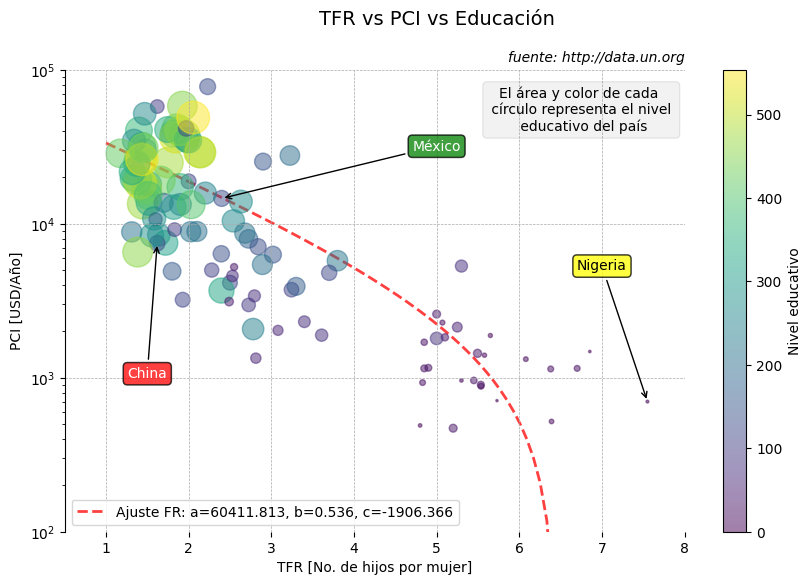

In [35]:
fig = plt.figure(figsize=(10,6)) # Cambiamos el tamaño de la figura

# Eje x: TFR
# Eje y: PCI
# Area y color: Educación

se = np.array(le) * 5
max_se = np.max(se)
color = [int(c) for c in se]
scatter = plt.scatter(lf, li, marker='o', c=se, alpha=0.5, s=se, cmap="viridis") 
plt.colorbar(mappable=scatter, label='Nivel educativo')

plt.title('fuente: http://data.un.org', loc='right', fontstyle='italic', fontsize=10)
plt.suptitle('TFR vs PCI vs Educación ', y = 0.98, fontsize=14)
    
plt.grid(ls='--', lw=0.5, c='#AAAAAA')
plt.xlabel('TFR [No. de hijos por mujer]')
plt.ylabel('PCI [USD/Año]')

# Gráficamos el ajuste entre fertilidad e ingresos
plt.plot(x, y, '--', c='red', lw=2.0, zorder=0, alpha=0.75,
         label='Ajuste FR: a={:5.3f}, b={:5.3}, c={:5.3f}'.format(popt[0], popt[1], popt[2]))

# Identificamos algunos países en el gráfico
ipm = lista_paises_final3.index('Mexico')
plt.annotate('México', xy=(lf[ipm], li[ipm]), xytext=(5, 30000),
             bbox=dict(boxstyle='round', facecolor='green', edgecolor='black', alpha=0.75, linewidth=1.1),
             arrowprops=dict(arrowstyle='->', facecolor='black', edgecolor='black'),
             fontsize=10, color='white', horizontalalignment='center')

ipn = lista_paises_final3.index('Niger')
plt.annotate('Nigeria', xy=(lf[ipn], li[ipn]), xytext=(7, 5000),
             bbox=dict(boxstyle='round', facecolor='yellow', edgecolor='black', alpha=0.75, linewidth=1.1),
             arrowprops=dict(arrowstyle='->', facecolor='black', edgecolor='black'),
             fontsize=10, color='black', horizontalalignment='center')

ipj = lista_paises_final3.index('China')
plt.annotate('China', xy=(lf[ipj], li[ipj]), xytext=(1.5, 1000),
             bbox=dict(boxstyle='round', facecolor='red', edgecolor='black', alpha=0.75, linewidth=1.1),
             arrowprops=dict(arrowstyle='->', facecolor='black', edgecolor='black'),
             fontsize=10, color='white', horizontalalignment='center')

# Agregamos un poco más de información
plt.text(6.75, 40000, 'El área y color de cada \n círculo representa el nivel \n educativo del país',                   
             transform=plt.gca().transData, 
             horizontalalignment='center', color='black',
             bbox=dict(boxstyle='round', facecolor='gray', edgecolor='black', alpha=0.1, linewidth=0.75)) 

# Usamos escala semilogarítmica
plt.yscale('log')
plt.ylim(1e2,1e5)
plt.xlim(0.5,8)
plt.legend(loc='lower left', fontsize=10)

# Eliminamos parte del recuadro de la figura.
ejes = fig.axes
ejes[0].spines['right'].set_visible(False)
ejes[0].spines['top'].set_visible(False)
ejes[0].spines['bottom'].set_visible(False)

plt.savefig('Ajuste02.pdf')
plt.show()

- ¿Puede contar la historia de esta última visualización?
- ¿Hay algo que sobre o que falte?